In [1]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
import scipy 
import pandas as pd
from pandas.api.types import is_string_dtype
import scipy.stats as stats
from pandas.api.types import is_numeric_dtype

## ANALISIS DE DATOS BD **SIN** VALORES DE DEPRESION

In [54]:
#leer la base de datos sin depresion
df = pd.read_csv('data_sin_depresion/cleaned_sabe_healthy.csv', encoding='latin-1')

In [3]:
df.drop(df.loc[df['estado_civil']==9].index, axis=0, inplace = True)

In [4]:
df.drop(df.loc[df['actividad_fisica']==9].index, axis=0, inplace = True)

In [5]:
df.drop('tiene_depresion', axis=1, inplace = True)

In [6]:
len(df.columns)

91

In [7]:
pie_chart = []
pie_manual= []
hist = []
for col in df.columns:
    if df[col].nunique()<= 2:
        pie_chart.append(col)
    elif df[col].nunique()>4:
        hist.append(col)
    else :
        pie_manual.append(col)

In [8]:
len(pie_chart)

48

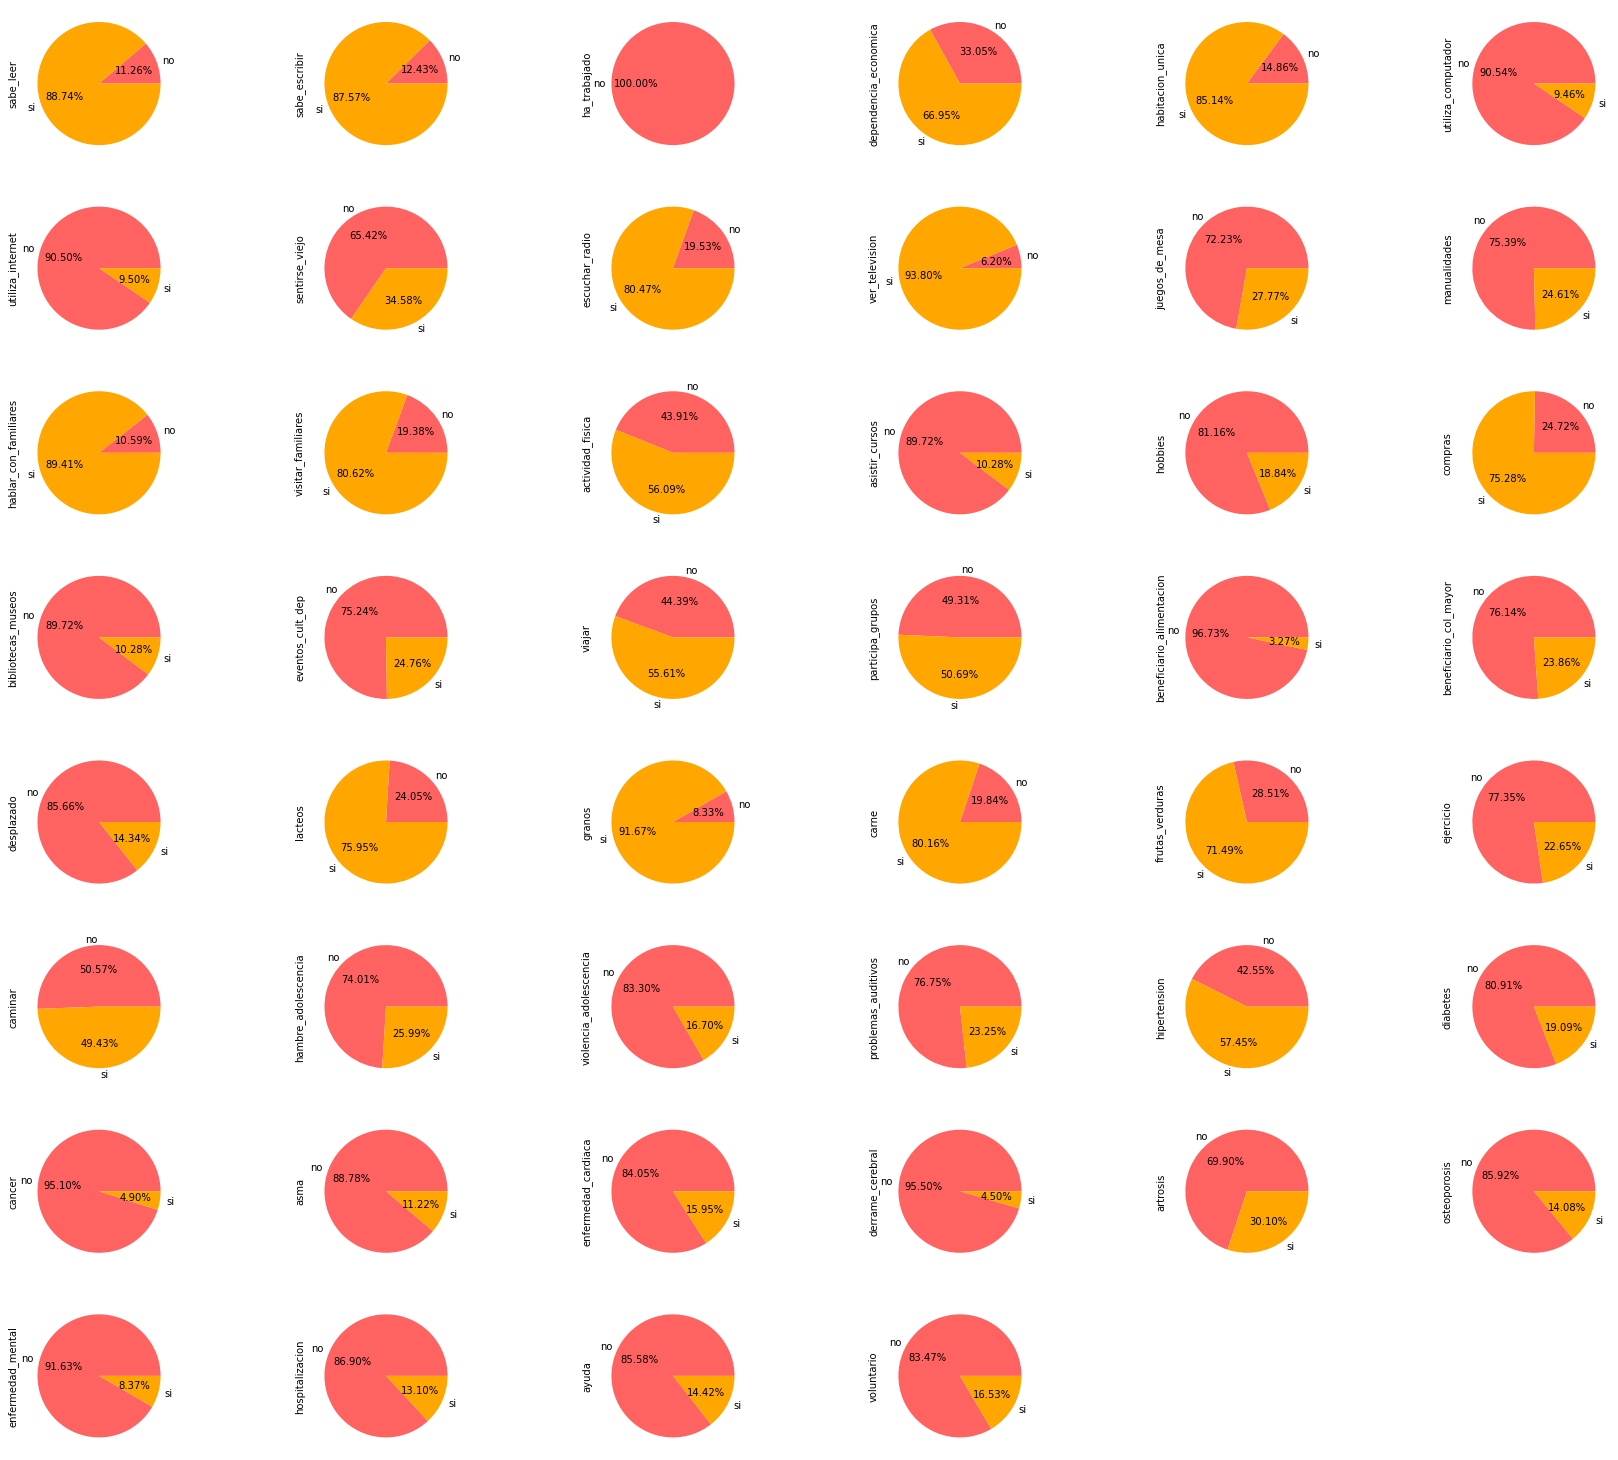

In [9]:
plt.figure(figsize=(30,30))
for i, col in enumerate(pie_chart[2:]):
    plt.subplot(9,6 , i+1)
    df.groupby(col).size().plot(kind='pie', legend=False, ylabel = col, autopct='%1.2f%%', labels = ['no','si'], colors = ['#ff6361' ,'#ffa600'])
    plt.legend('', frameon = False)

        

In [10]:
pie_manual

['afiliacion_pension',
 'religion',
 'alimentacion',
 'comidas_al_dia',
 'consumo_cigarrillo',
 'problemas_memoria',
 'economia_familiar',
 'salud_adolescencia',
 'abuso_gritos',
 'abuso_maltrato_fisico',
 'abuso_agresion',
 'abandono',
 'abuso_economico',
 'color_piel',
 'cogcat_folstein',
 'nivel_dependencia']

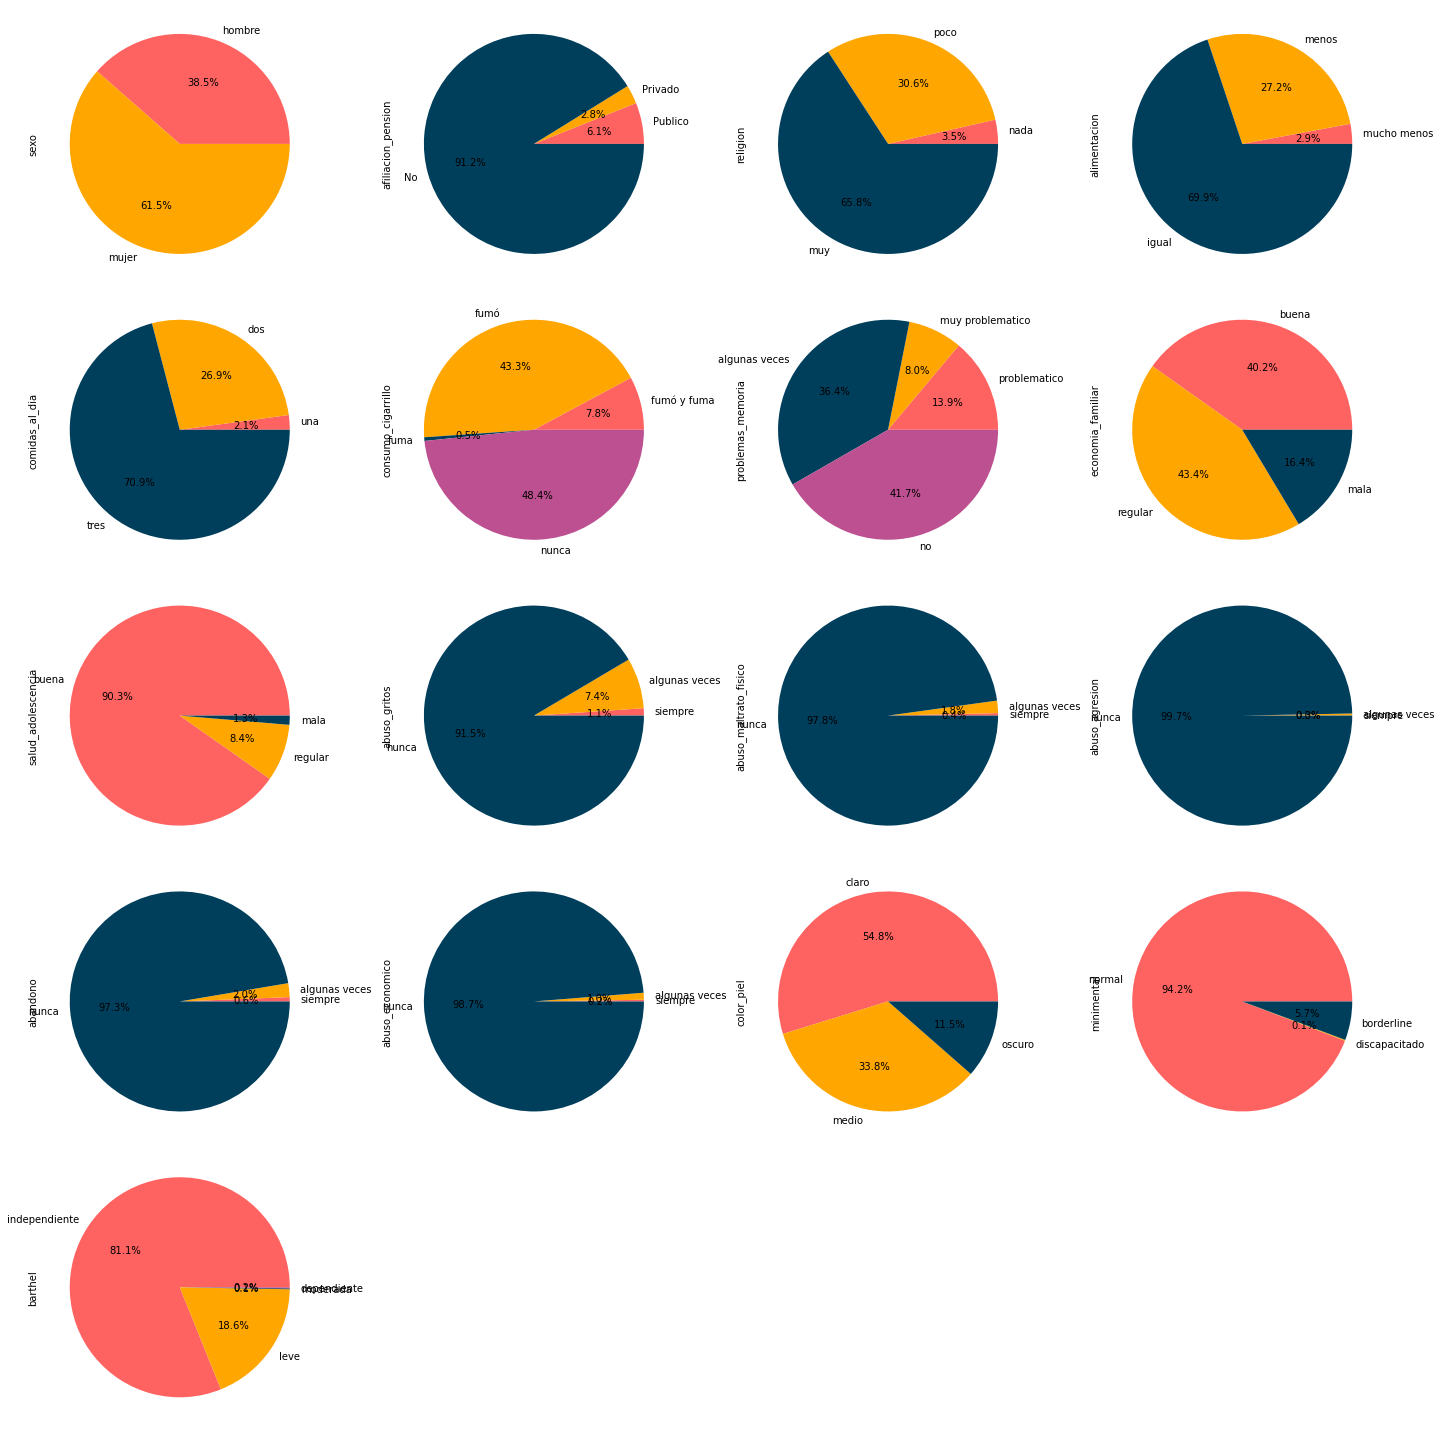

In [11]:
#fig para data sin depresion
fig, axes = plt.subplots(5, 4, figsize = (20,20)) 
df.groupby('sexo').size().plot(kind='pie', legend=False, ylabel = 'sexo',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['hombre', 'mujer'], ax= axes[0][0])
df.groupby('afiliacion_pension').size().plot(kind='pie', legend=False, ylabel = 'afiliacion_pension',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['Publico', 'Privado','No'], ax= axes[0][1])
df.groupby('religion').size().plot(kind='pie', legend=False, ylabel = 'religion',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['nada', 'poco','muy'], ax= axes[0][2])
df.groupby('alimentacion').size().plot(kind='pie', legend=False, ylabel = 'alimentacion',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['mucho menos', 'menos','igual'], ax= axes[0][3])
df.groupby('comidas_al_dia').size().plot(kind='pie', legend=False, ylabel = 'comidas_al_dia',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['una', 'dos','tres'], ax= axes[1][0])
df.groupby('consumo_cigarrillo').size().plot(kind='pie', legend=False, ylabel = 'consumo_cigarrillo',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c','#bc5090'], labels = ['fumó y fuma', 'fumó','fuma','nunca'], ax= axes[1][1])
df.groupby('problemas_memoria').size().plot(kind='pie', legend=False, ylabel = 'problemas_memoria',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c','#bc5090'], labels = ['problematico', 'muy problematico','algunas veces','no'], ax= axes[1][2])
#df.groupby('comparacion_memoria').size().plot(kind='pie', legend=False, ylabel = 'comparacion_memoria',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['mejor', 'igual','peor'], ax= axes[1][3])
df.groupby('economia_familiar').size().plot(kind='pie', legend=False, ylabel = 'economia_familiar',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['buena', 'regular','mala'], ax= axes[1][3])
df.groupby('salud_adolescencia').size().plot(kind='pie', legend=False, ylabel = 'salud_adolescencia',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['buena', 'regular','mala'], ax= axes[2][0])
df.groupby('abuso_gritos').size().plot(kind='pie', legend=False, ylabel = 'abuso_gritos',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['siempre', 'algunas veces','nunca'], ax= axes[2][1])
df.groupby('abuso_maltrato_fisico').size().plot(kind='pie', legend=False, ylabel = 'abuso_maltrato_fisico',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['siempre', 'algunas veces','nunca'], ax= axes[2][2])
df.groupby('abuso_agresion').size().plot(kind='pie', legend=False, ylabel = 'abuso_agresion',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['siempre', 'algunas veces','nunca'], ax= axes[2][3])
df.groupby('abandono').size().plot(kind='pie', legend=False, ylabel = 'abandono',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['siempre', 'algunas veces','nunca'], ax= axes[3][0])
df.groupby('abuso_economico').size().plot(kind='pie', legend=False, ylabel = 'abuso_economico',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['siempre', 'algunas veces','nunca'], ax= axes[3][1])
df.groupby('color_piel').size().plot(kind='pie', legend=False, ylabel = 'color_piel',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['claro', 'medio','oscuro'], ax= axes[3][2])
df.groupby('cogcat_folstein').size().plot(kind='pie', legend=False, ylabel = 'minimental',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['normal', 'discapacitado','borderline'], ax= axes[3][3])
df.groupby('nivel_dependencia').size().plot(kind='pie', legend=False, ylabel = 'barthel',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c','#bc5090'], labels = ['independiente', 'leve','moderada','dependiente'], ax= axes[4][0])

fig.delaxes(ax= axes[4][1])
fig.delaxes(ax= axes[4][2])
fig.delaxes(ax= axes[4][3])

plt.legend('', frameon = False)
plt.tight_layout()
plt.show()



In [12]:
hist

['estrato',
 'edad',
 'estado_civil',
 'num_personas_hogar',
 'afiliacion_salud',
 'a_educacion',
 'nivel_educativo',
 'edad_primer_trabajo',
 'tipo_de_trabajo',
 'ingresos',
 'satisfaccion_ingresos',
 'tipo_vivienda',
 'posesion_vivienda',
 'fuente_de_agua',
 'medio_transporte',
 'consumo_alcohol',
 'sexualidad',
 'mem_subjetiva',
 'percepcion_salud',
 'vision',
 'peso',
 'talla',
 'circunferencia_cintura',
 'IMC',
 'minimental',
 'test_depresion',
 'barthel']

In [13]:
df_hist = df.copy()

In [14]:
df_hist.head()

,area_vivienda,estrato,sexo,edad,estado_civil,num_personas_hogar,afiliacion_pension,afiliacion_salud,sabe_leer,sabe_escribir,...,circunferencia_cintura,color_piel,IMC,minimental,cogcat_folstein,test_depresion,barthel,nivel_dependencia,ayuda,voluntario
0,1,2,2,79,3,5,3,2,1,1,...,95,0,0.804915,23.0,1,18,100,1,1,0
1,1,2,1,66,1,7,3,2,1,1,...,100,1,26.825180,28.0,1,18,100,1,0,0
2,1,2,2,62,1,7,3,1,1,1,...,94,0,26.311111,25.0,1,20,100,1,0,0
3,1,3,2,65,2,7,3,2,1,1,...,777,0,12.870013,29.0,1,14,25,4,0,0
4,1,3,2,66,5,3,3,1,1,1,...,81,0,23.146458,29.0,1,15,100,1,0,0


In [15]:
df_hist['estado_civil'].replace({1:'casado', 2:'unido', 3:'separado', 4:'viudo', 5:'soltero'}, inplace= True)
df_hist['afiliacion_salud'].replace({1:'contributivo',2:'subsidiado',3:'De excepcion',4:'Especial',5:'No afiliado'},inplace= True)
df_hist['nivel_educativo'].replace({1:'Ninguno',2:'primaria incompleta',3:'primaria',4:'secundaria incompleta',5:'secundaria',6:'Técnico sin titulo',7:'Técnico',8:'Universitario sin titulo',9:'Universitario',10:'Posgrado sin titulo', 11: 'Posgrado'},inplace= True)
df_hist['tipo_de_trabajo'].replace({1:'empleado particular',2:'empleado gobierno',3:'jornalero',4:'Empleador',5:'trabajador independiente', 6:'trabajador no remunerado', 7:'profesional independiente', 8:'trabajador a destajo', 9:'empleado domestico'},inplace= True)
df_hist['ingresos'].replace({1:'<1SMLV', 2:'1 SMLV',3:'hasta 1.288.700',4:'hasta 1.933.050',5:'hasta 2.577.400', 6:'mas de 2.577 mil'},inplace= True)
df_hist['satisfaccion_ingresos'].replace({1:'muy',2:'Satisfecho',3:'neutral',4:'poco satisfecho',5:'insatisfecho'},inplace= True)
df_hist['tipo_vivienda'].replace({1:'casa',2:'apartamento',3:'cuarto inquilinato',4:'cuarto',5:'indigena',6:'otro'},inplace= True)
df_hist['posesion_vivienda'].replace({1:'arriendo',2:'vivienda propia pagando',3:'vivienda propia',4:'vivienda en usufructo',5:'vivienda en empeño',6:'ocupante', 7:'propiedad colectiva',8:'propiedad de un familiar'},inplace= True)
df_hist['fuente_de_agua'].replace({1:'Acueducto público',2:'Acueducto comunal',3:'Pila pública',4:'Pozo con bomba',5:'Pozo sin bomba', 6:'rio',7:'carro tanque', 8:'aguatero',9:'agua embotellada', 10:'agua lluvia', 11:'acequia'},inplace= True)
df_hist['medio_transporte'].replace({1:'taxi',2:'transporte empresa',3:'publico',4:'carro propio manejado',5:'carro propio no manejado', 6:'carro particular', 7:'moto', 8:'animal',9:'bicicleta',10:'acuatico', 11:'a pie',12:'no sale de casa'},inplace= True)
df_hist['consumo_alcohol'].replace({1:'<1dia',2:'2-3 dias',3:'4-6 dias',4:'todos los dias',5:'no consumió'},inplace= True)
df_hist['sexualidad'].replace({1:'muy importante',2:'importante',3:'neutro',4:'poco impo',5:'nada'},inplace= True)
df_hist['mem_subjetiva'].replace({1:'muy buena',2:'buena',3:'regular',4:'mala',5:'muy mala'},inplace= True)
df_hist['percepcion_salud'].replace({1:'muy buena',2:'buena',3:'regular',4:'mala',5:'muy mala'},inplace= True)
df_hist['cogcat_folstein'].replace({1:'Normal', 2:'discapacitado',3:'limite'}, inplace=True)
df_hist['problemas_memoria'].replace({1:'problematico',2:'serio',3:'no es problema', 4:'no tengo'}, inplace=True)

In [16]:
df.columns

Index(['area_vivienda', 'estrato', 'sexo', 'edad', 'estado_civil',
       'num_personas_hogar', 'afiliacion_pension', 'afiliacion_salud',
       'sabe_leer', 'sabe_escribir', 'a_educacion', 'nivel_educativo',
       'ha_trabajado', 'edad_primer_trabajo', 'tipo_de_trabajo', 'ingresos',
       'dependencia_economica', 'satisfaccion_ingresos', 'tipo_vivienda',
       'posesion_vivienda', 'habitacion_unica', 'utiliza_computador',
       'utiliza_internet', 'fuente_de_agua', 'medio_transporte', 'religion',
       'sentirse_viejo', 'escuchar_radio', 'ver_television', 'juegos_de_mesa',
       'manualidades', 'hablar_con_familiares', 'visitar_familiares',
       'actividad_fisica', 'asistir_cursos', 'hobbies', 'compras',
       'bibliotecas_museos', 'eventos_cult_dep', 'viajar', 'participa_grupos',
       'beneficiario_alimentacion', 'beneficiario_col_mayor', 'desplazado',
       'alimentacion', 'comidas_al_dia', 'lacteos', 'granos', 'carne',
       'frutas_verduras', 'consumo_alcohol', 'consu

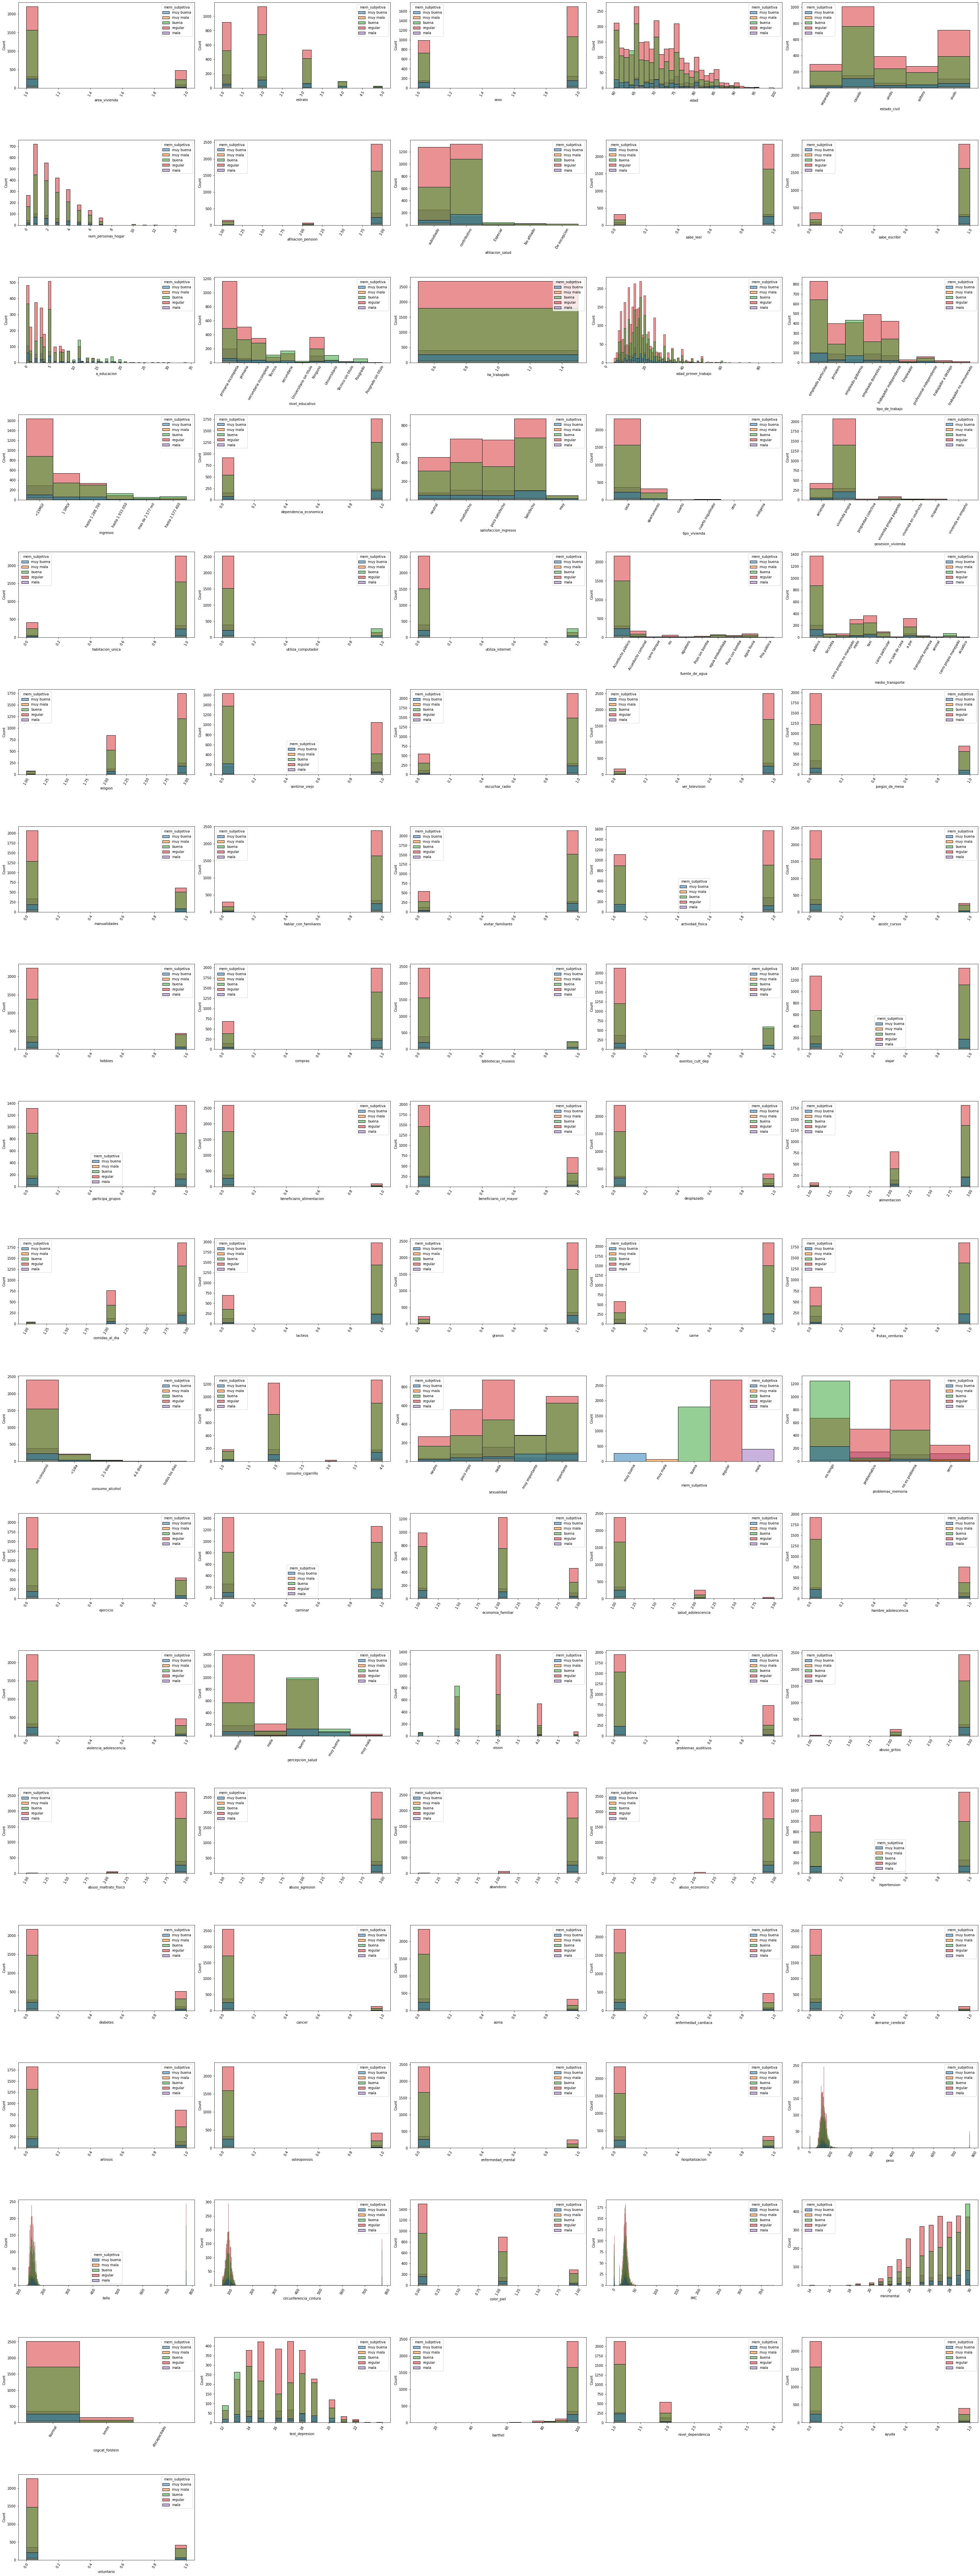

In [17]:
plt.figure(figsize=(40,110))
for i, col in enumerate(df.columns):
    plt.subplot(20,5, i+1)
    sns.histplot(data= df_hist, x= col,  hue= 'mem_subjetiva')
    plt.xticks(rotation = 60)
    plt.tight_layout()

In [18]:
df['actividad_fisica'].value_counts() #si-> 1/ 2-> no

2    2929
1    2293
Name: actividad_fisica, dtype: int64

In [19]:
df['actividad_fisica'].rename({2:0}, inplace= True)

In [20]:
df.dtypes

area_vivienda        int64
estrato              int64
sexo                 int64
edad                 int64
estado_civil         int64
                     ...  
test_depresion       int64
barthel              int64
nivel_dependencia    int64
ayuda                int64
voluntario           int64
Length: 91, dtype: object

In [21]:
df['problemas_auditivos'].value_counts()

0    4008
1    1214
Name: problemas_auditivos, dtype: int64

In [22]:
#definir un nuevo df con las columnas con mayor relacion con mem_subjetiva
#df = df[['percepcion_salud','mem_subjetiva','estrato','edad','sabe_escribir','nivel_educativo','sabe_leer','a_educacion','manualidades','hobbies','bibliotecas_museos','eventos_cult_dep','ingresos','utiliza_computador','utiliza_internet','sentirse_viejo','juegos_de_mesa','asistir_cursos','actividad_fisica','sexualidad','ejercicio','caminar','problemas_auditivos','minimental','test_depresion']]

In [23]:
#correlacion entre variables binarias y continuas
columna = []
valor = []
col_continua = ['edad','minimental','test_depresion','num_personas_hogar','peso','talla','circunferencia_cintura','IMC','barthel']
for col in col_continua:
    corr =  stats.pointbiserialr(df['mem_subjetiva'], df[col])
    columna.append(col)
    valor.append(corr)
    

In [24]:
correlacion = pd.DataFrame(valor,columna)

In [25]:
correlacion

,correlation,pvalue
edad,0.125244,1.044536e-19
minimental,-0.201973,3.364490e-49
test_depresion,0.053327,1.155265e-04
num_personas_hogar,-0.019279,1.636204e-01
peso,-0.017516,2.056731e-01
talla,-0.029156,3.513112e-02
circunferencia_cintura,-0.027223,4.916709e-02
IMC,0.016679,2.281629e-01
barthel,-0.062983,5.244401e-06


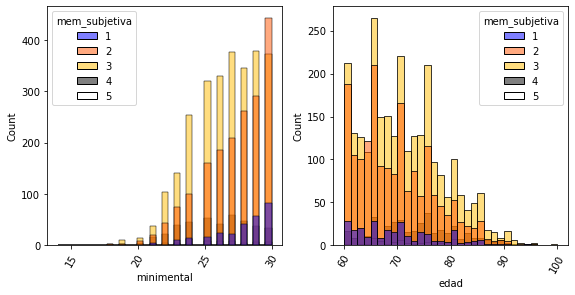

In [26]:
# 1:'muy buena',2:'buena',3:'regular',4:'mala',5:'muy mala'
cols= ['minimental','edad']
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(5,5, i+1)
    sns.histplot(data= df, x= col,  hue= 'mem_subjetiva', palette= ['blue','#ff5400','#ffbd00','black','white'])
    plt.xticks(rotation = 60)
    #plt.xticks([0,10])
    plt.tight_layout()

In [27]:
#convertir memoria subjetiva/nivel educativo/sexualidad/ingresos a dummy
df= pd.get_dummies(df, columns = ['mem_subjetiva','nivel_educativo','sexualidad','ingresos','estrato', 'percepcion_salud','estado_civil','tipo_de_trabajo','satisfaccion_ingresos','posesion_vivienda','tipo_vivienda','cogcat_folstein'])

In [28]:
df.rename(columns={'mem_subjetiva_1':'mem_muy_buena','mem_subjetiva_2':'mem_buena','mem_subjetiva_3':'mem_regular','mem_subjetiva_4':'mem_mala','mem_subjetiva_5':'mem_muy_mala','sexualidad_1':'sex_muy_importante','sexualidad_2':'sex_importante','sexualidad_3':'sex_neutro','sexualidad_4':'sex_poco_imp','sexualidad_5':'sex_nada_imp','nivel_educativo_1':'edu_ninguno','nivel_educativo_2':'primaria_incompleta','nivel_educativo_3':'primaria','nivel_educativo_4':'secundaria_incompleta','nivel_educativo_5':'secundaria','nivel_educativo_6':'tecnico_sin_titulo','nivel_educativo_7':'tecnico','nivel_educativo_8':'universitario_sin_titulo','nivel_educativo_9':'universitario','nivel_educativo_10':'posgrado_sin_titulo', 'nivel_educativo_11': 'posgrado','ingresos_1':'<1SMLV', 'ingresos_2':'1SMLV','ingresos_3':'hasta_1.288','ingresos_4':'hasta_1.933','ingresos_5':'hasta_2.577', 'ingresos_6':'mas_de_2.577','percepcion_salud_1':'perc_muy_buena','percepcion_salud_2':'perc_buena','percepcion_salud_3':'perc_regular','percepcion_salud_4':'perc_mala','percepcion_salud_5':'perc_muy mala','estado_civil_1':'casado','estado_civil_2':'unido','estado_civil_3':'separado','estado_civil_4':'viudo','estado_civil_5':'soltero','tipo_de_trabajo_1':'empleado particular','tipo_de_trabajo_2':'empleado gobierno','tipo_de_trabajo_3':'jornalero','tipo_de_trabajo_4':'Empleador','tipo_de_trabajo_5':'trabajador_independiente', 'tipo_de_trabajo_6':'trabajador_no_remunerado', 'tipo_de_trabajo_7':'profesional_independiente', 'tipo_de_trabajo_8':'trabajador_destajo', 'tipo_de_trabajo_9':'empleado_domestico','satisfaccion_ingresos_1':'muy_sat_ingreso','satisfaccion_ingresos_2':'satisfecho_ingreso','satisfaccion_ingresos_3':'neutral_ingreso','satisfaccion_ingresos_4':'poco_satisfecho_ingreso','satisfaccion_ingresos_5':'insatisfecho_ingreso','posesion_vivienda_1':'arriendo','posesion_vivienda_2':'vivienda propia pagando','posesion_vivienda_3':'vivienda propia','posesion_vivienda_4':'vivienda en usufructo','posesion_vivienda_5':'vivienda en empeño','posesion_vivienda_6':'ocupante', 'posesion_vivienda_7':'propiedad_colectiva','posesion_vivienda_8':'propiedad_familiar','tipo_vivienda_1':'casa','tipo_vivienda_2':'apartamento','tipo_vivienda_3':'cuarto inquilinato','tipo_vivienda_4':'cuarto','tipo_vivienda_5':'indigena','tipo_vivienda_6':'otro','cogcat_folstein_1':'normal','cogcat_folstein_2':'impaired','cogcat_folstein_3':'borderline'}, inplace= True)

In [29]:
df.isna().sum()

area_vivienda         0
sexo                  0
edad                  0
num_personas_hogar    0
afiliacion_pension    0
                     ..
indigena              0
otro                  0
normal                0
impaired              0
borderline            0
Length: 151, dtype: int64

In [30]:
#Correlacion con variables de interes: 
corr = []
columna = []
p_val = []
for col in df.columns:
    r, p = stats.pearsonr(df['minimental'], df[col])
    if p< 0.005 and r >0.3:
        columna.append(col)
        p_val.append(p)
        corr.append(r)

In [31]:
correlacion_binaria = pd.DataFrame(list(zip(columna,p_val,corr)), columns=['columna','p_value','correlacion'])

In [32]:
correlacion_binaria.sort_values(by =['correlacion'],ascending=True)

,columna,p_value,correlacion
2,a_educacion,1.121162e-120,0.315054
0,sabe_leer,2.478328e-220,0.418306
1,sabe_escribir,1.336473e-227,0.424556
4,normal,0.000000e+00,0.546806
3,minimental,0.000000e+00,1.000000


In [33]:
#assert(False)

## ANALISIS DE DATOS BD VALORES *CON* DEPRESION


In [34]:
#leer base de datos con depresion
df = pd.read_csv('data_con_depresion/cleaned_sabe_depresion.csv', encoding='latin-1')

In [35]:
len(df.columns)

67

In [36]:
df['tiene_depresion'].value_counts()

2    13234
1     3485
3     2560
Name: tiene_depresion, dtype: int64

In [37]:
df.drop(df.loc[df['estado_civil']==9].index, axis=0, inplace = True)

In [38]:
df.drop(df.loc[df['actividad_fisica']==9].index, axis=0, inplace = True)


In [39]:
pie_chart = []
pie_manual= []
hist = []
for col in df.columns:
    if df[col].nunique()<= 2:
        pie_chart.append(col)
    elif df[col].nunique()>=4:
        hist.append(col)
    else :
        pie_manual.append(col)

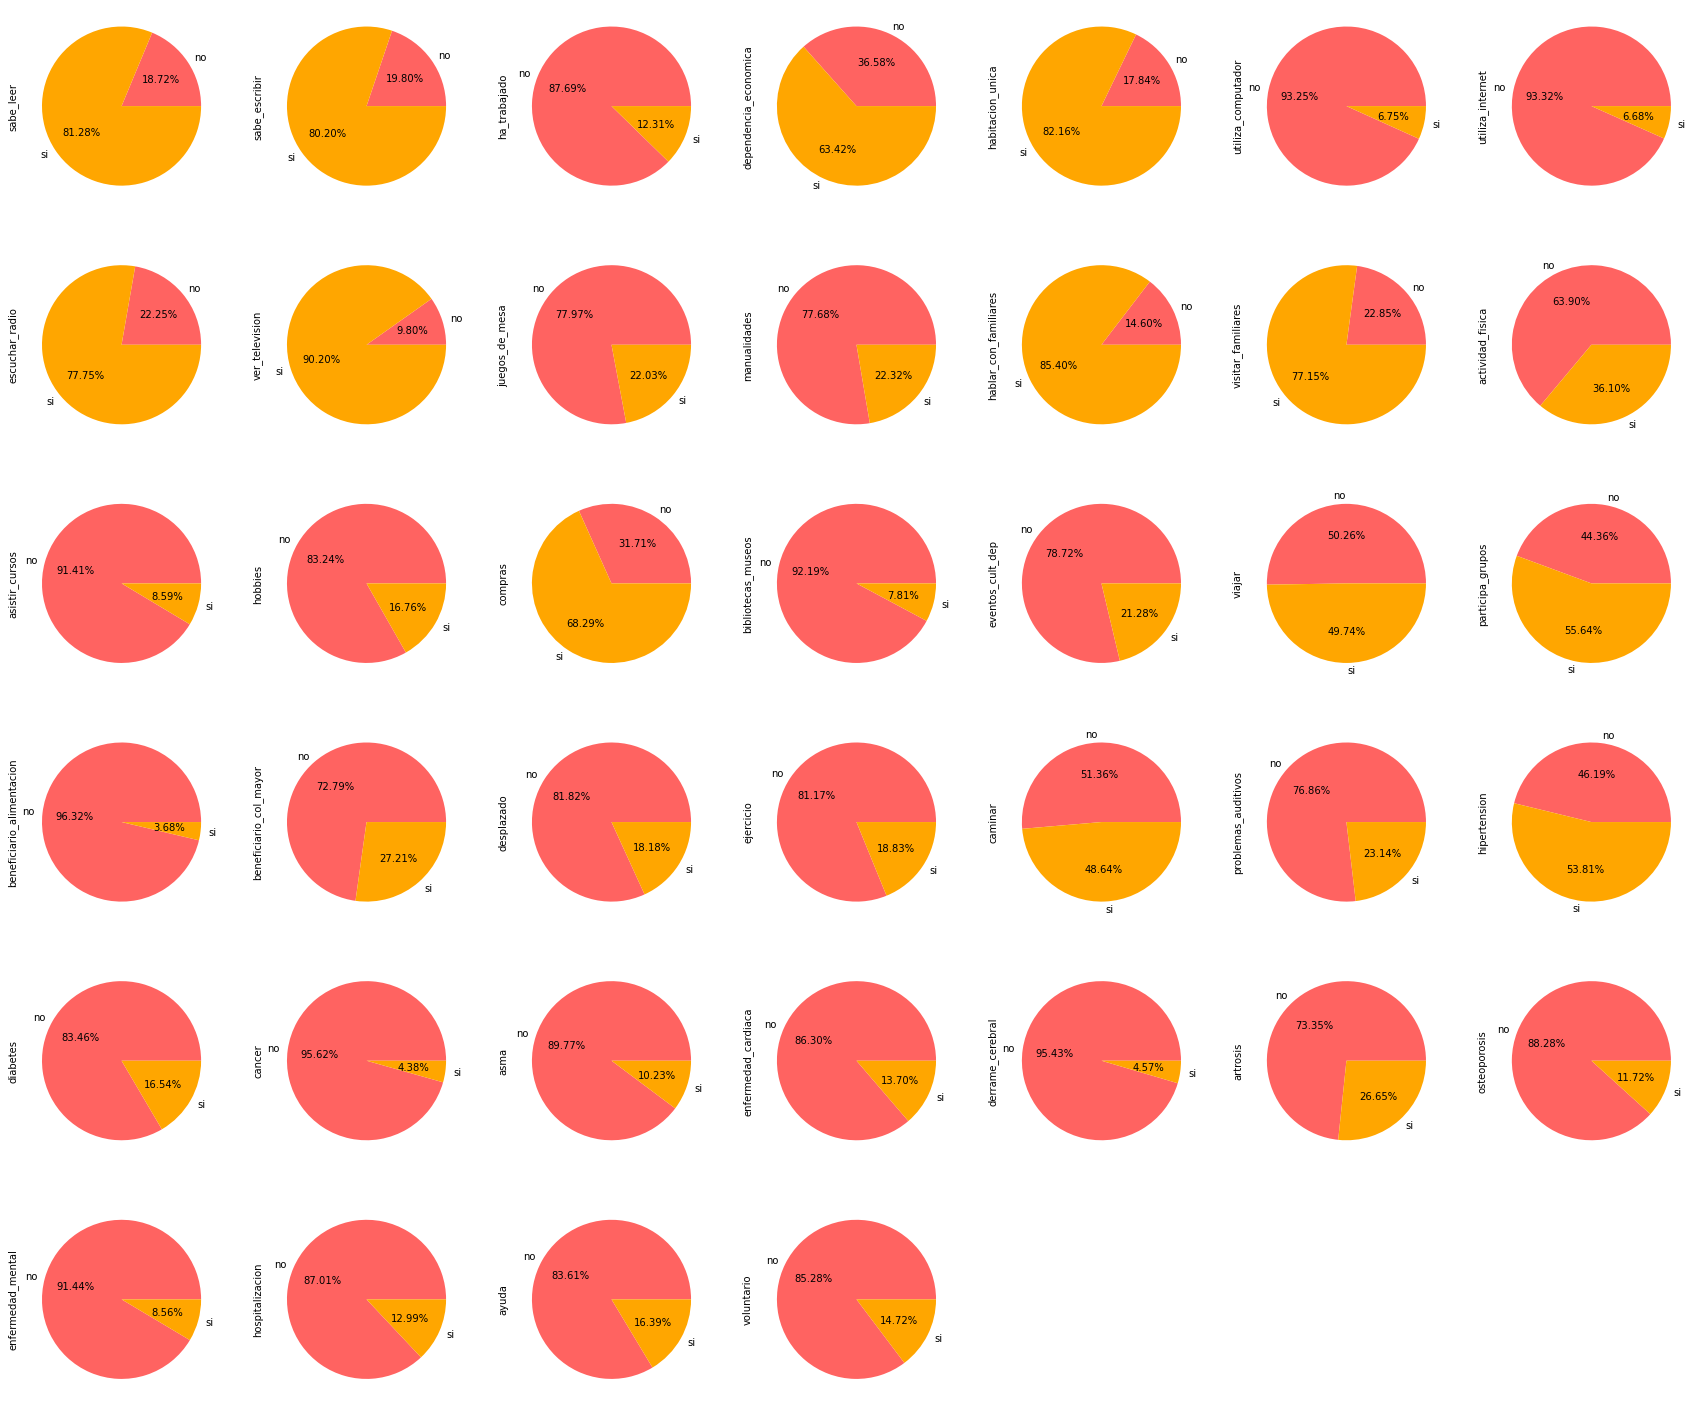

In [40]:
plt.figure(figsize=(30,30))
for i, col in enumerate(pie_chart[2:]):
    plt.subplot(7,7 , i+1)
    df.groupby(col).size().plot(kind='pie', legend=False, ylabel = col, autopct='%1.2f%%', labels = ['no','si'], colors = ['#ff6361' ,'#ffa600'])
    plt.legend('', frameon = False)

        

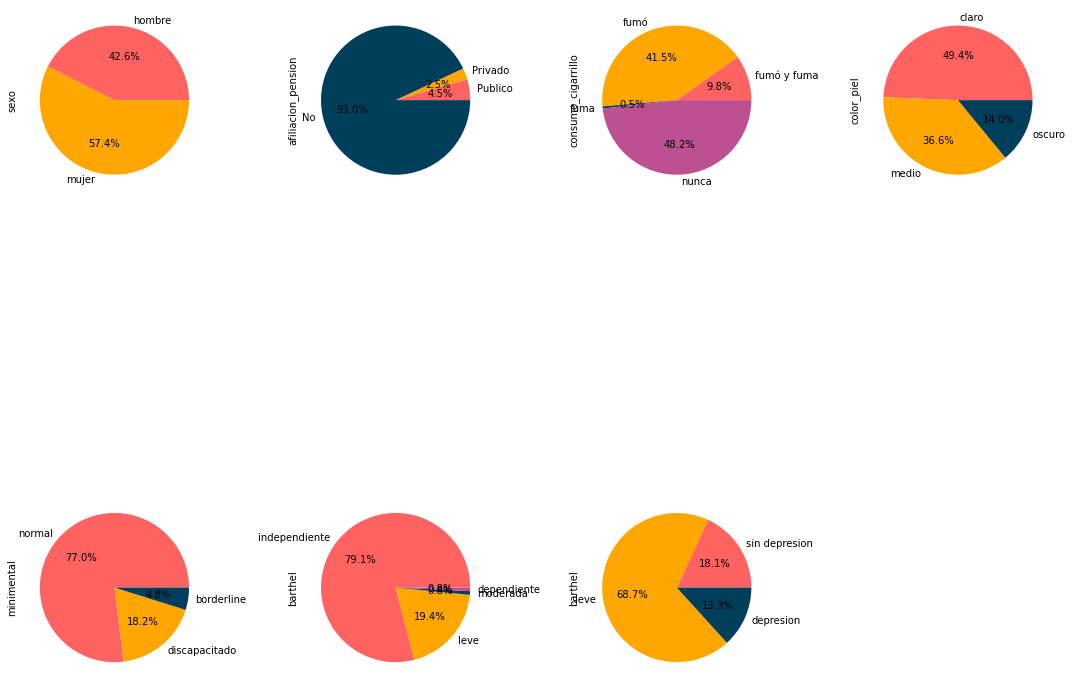

In [41]:
#fig para data con depresion
fig, axes = plt.subplots(2, 4, figsize = (15,15)) 
df.groupby('sexo').size().plot(kind='pie', legend=False, ylabel = 'sexo',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['hombre', 'mujer'], ax= axes[0][0])
df.groupby('afiliacion_pension').size().plot(kind='pie', legend=False, ylabel = 'afiliacion_pension',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['Publico', 'Privado','No'], ax= axes[0][1])
df.groupby('consumo_cigarrillo').size().plot(kind='pie', legend=False, ylabel = 'consumo_cigarrillo',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c','#bc5090'], labels = ['fumó y fuma', 'fumó','fuma','nunca'], ax= axes[0][2])
df.groupby('color_piel').size().plot(kind='pie', legend=False, ylabel = 'color_piel',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['claro', 'medio','oscuro'], ax= axes[0][3])
df.groupby('cogcat_folstein').size().plot(kind='pie', legend=False, ylabel = 'minimental',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c'], labels = ['normal', 'discapacitado','borderline'], ax= axes[1][0])
df.groupby('nivel_dependencia').size().plot(kind='pie', legend=False, ylabel = 'barthel',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c','#bc5090'], labels = ['independiente', 'leve','moderada','dependiente'], ax= axes[1][1])
df.groupby('tiene_depresion').size().plot(kind='pie', legend=False, ylabel = 'barthel',autopct='%1.1f%%', colors = ['#ff6361' ,'#ffa600','#003f5c','#bc5090'], labels = ['sin depresion', 'leve','depresion'], ax= axes[1][2])
fig.delaxes(ax= axes[1][3])

plt.legend('', frameon = False)
plt.tight_layout()
plt.show()


In [42]:
hist

['estrato',
 'edad',
 'estado_civil',
 'num_personas_hogar',
 'afiliacion_salud',
 'a_educacion',
 'nivel_educativo',
 'edad_primer_trabajo',
 'tipo_vivienda',
 'fuente_de_agua',
 'medio_transporte',
 'consumo_alcohol',
 'consumo_cigarrillo',
 'peso',
 'talla',
 'circunferencia_cintura',
 'minimental',
 'test_depresion',
 'barthel',
 'nivel_dependencia']

In [43]:
len(hist)

20

<AxesSubplot:xlabel='test_depresion', ylabel='Count'>

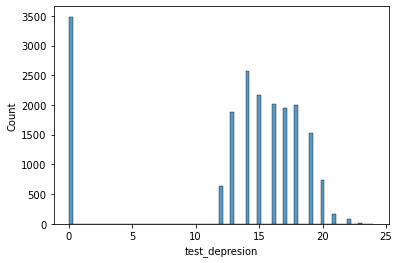

In [44]:
sns.histplot(data=df,x= 'test_depresion')

<AxesSubplot:xlabel='minimental', ylabel='Count'>

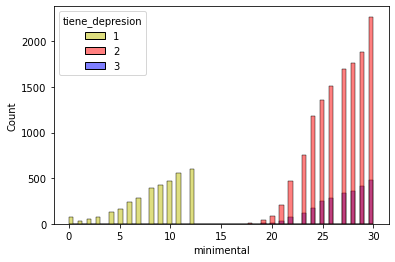

In [45]:
sns.histplot(data=df, x= 'minimental', hue= 'tiene_depresion', palette = ['y','r','blue'])

In [46]:
def depresion(valor):
        if valor>=19: 
            return 3 #Depresion
        elif 10 < valor and  valor < 19:
            return 2 #Depresion leve
        elif  0 < valor<=10:
            return 1 #Sin depresion

In [47]:
df['tiene_depresion']= df['test_depresion'].map(depresion)

In [48]:
df['tiene_depresion'].value_counts()
#No hay personas sin depresion en la bd 

2.0    13232
3.0     2557
Name: tiene_depresion, dtype: int64

In [49]:
df_hist =  df.copy()

In [50]:
df_hist['estado_civil'].replace({1:'casado', 2:'unido', 3:'separado', 4:'viudo', 5:'soltero'}, inplace= True)
df_hist['afiliacion_salud'].replace({1:'contributivo',2:'subsidiado',3:'De excepcion',4:'Especial',5:'No afiliado'},inplace= True)
df_hist['nivel_educativo'].replace({1:'Ninguno',2:'primaria incompleta',3:'primaria',4:'secundaria incompleta',5:'secundaria',6:'Técnico sin titulo',7:'Técnico',8:'Universitario sin titulo',9:'Universitario',10:'Posgrado sin titulo', 11: 'Posgrado'},inplace= True)
df_hist['tipo_vivienda'].replace({1:'casa',2:'apartamento',3:'cuarto inquilinato',4:'cuarto',5:'indigena',6:'otro'},inplace= True)
#df_hist['posesion_vivienda'].replace({1:'arriendo',2:'vivienda propia pagando',3:'vivienda propia',4:'vivienda en usufructo',5:'vivienda en empeño',6:'ocupante', 7:'propiedad colectiva',8:'propiedad de un familiar'},inplace= True)
df_hist['fuente_de_agua'].replace({1:'Acueducto público',2:'Acueducto comunal',3:'Pila pública',4:'Pozo con bomba',5:'Pozo sin bomba', 6:'rio',7:'carro tanque', 8:'aguatero',9:'agua embotellada', 10:'agua lluvia', 11:'acequia'},inplace= True)
df_hist['medio_transporte'].replace({1:'taxi',2:'transporte empresa',3:'publico',4:'carro propio manejado',5:'carro propio no manejado', 6:'carro particular', 7:'moto', 8:'animal',9:'bicicleta',10:'acuatico', 11:'a pie',12:'no sale de casa'},inplace= True)
df_hist['consumo_alcohol'].replace({1:'<1dia',2:'2-3 dias',3:'4-6 dias',4:'todos los dias',5:'no consumió'},inplace= True)
df_hist['cogcat_folstein'].replace({1:'Normal', 2:'discapacitado',3:'limite'}, inplace=True)
df_hist['tiene_depresion'].replace({2:'depresion leve',3:'depresion'}, inplace=True)

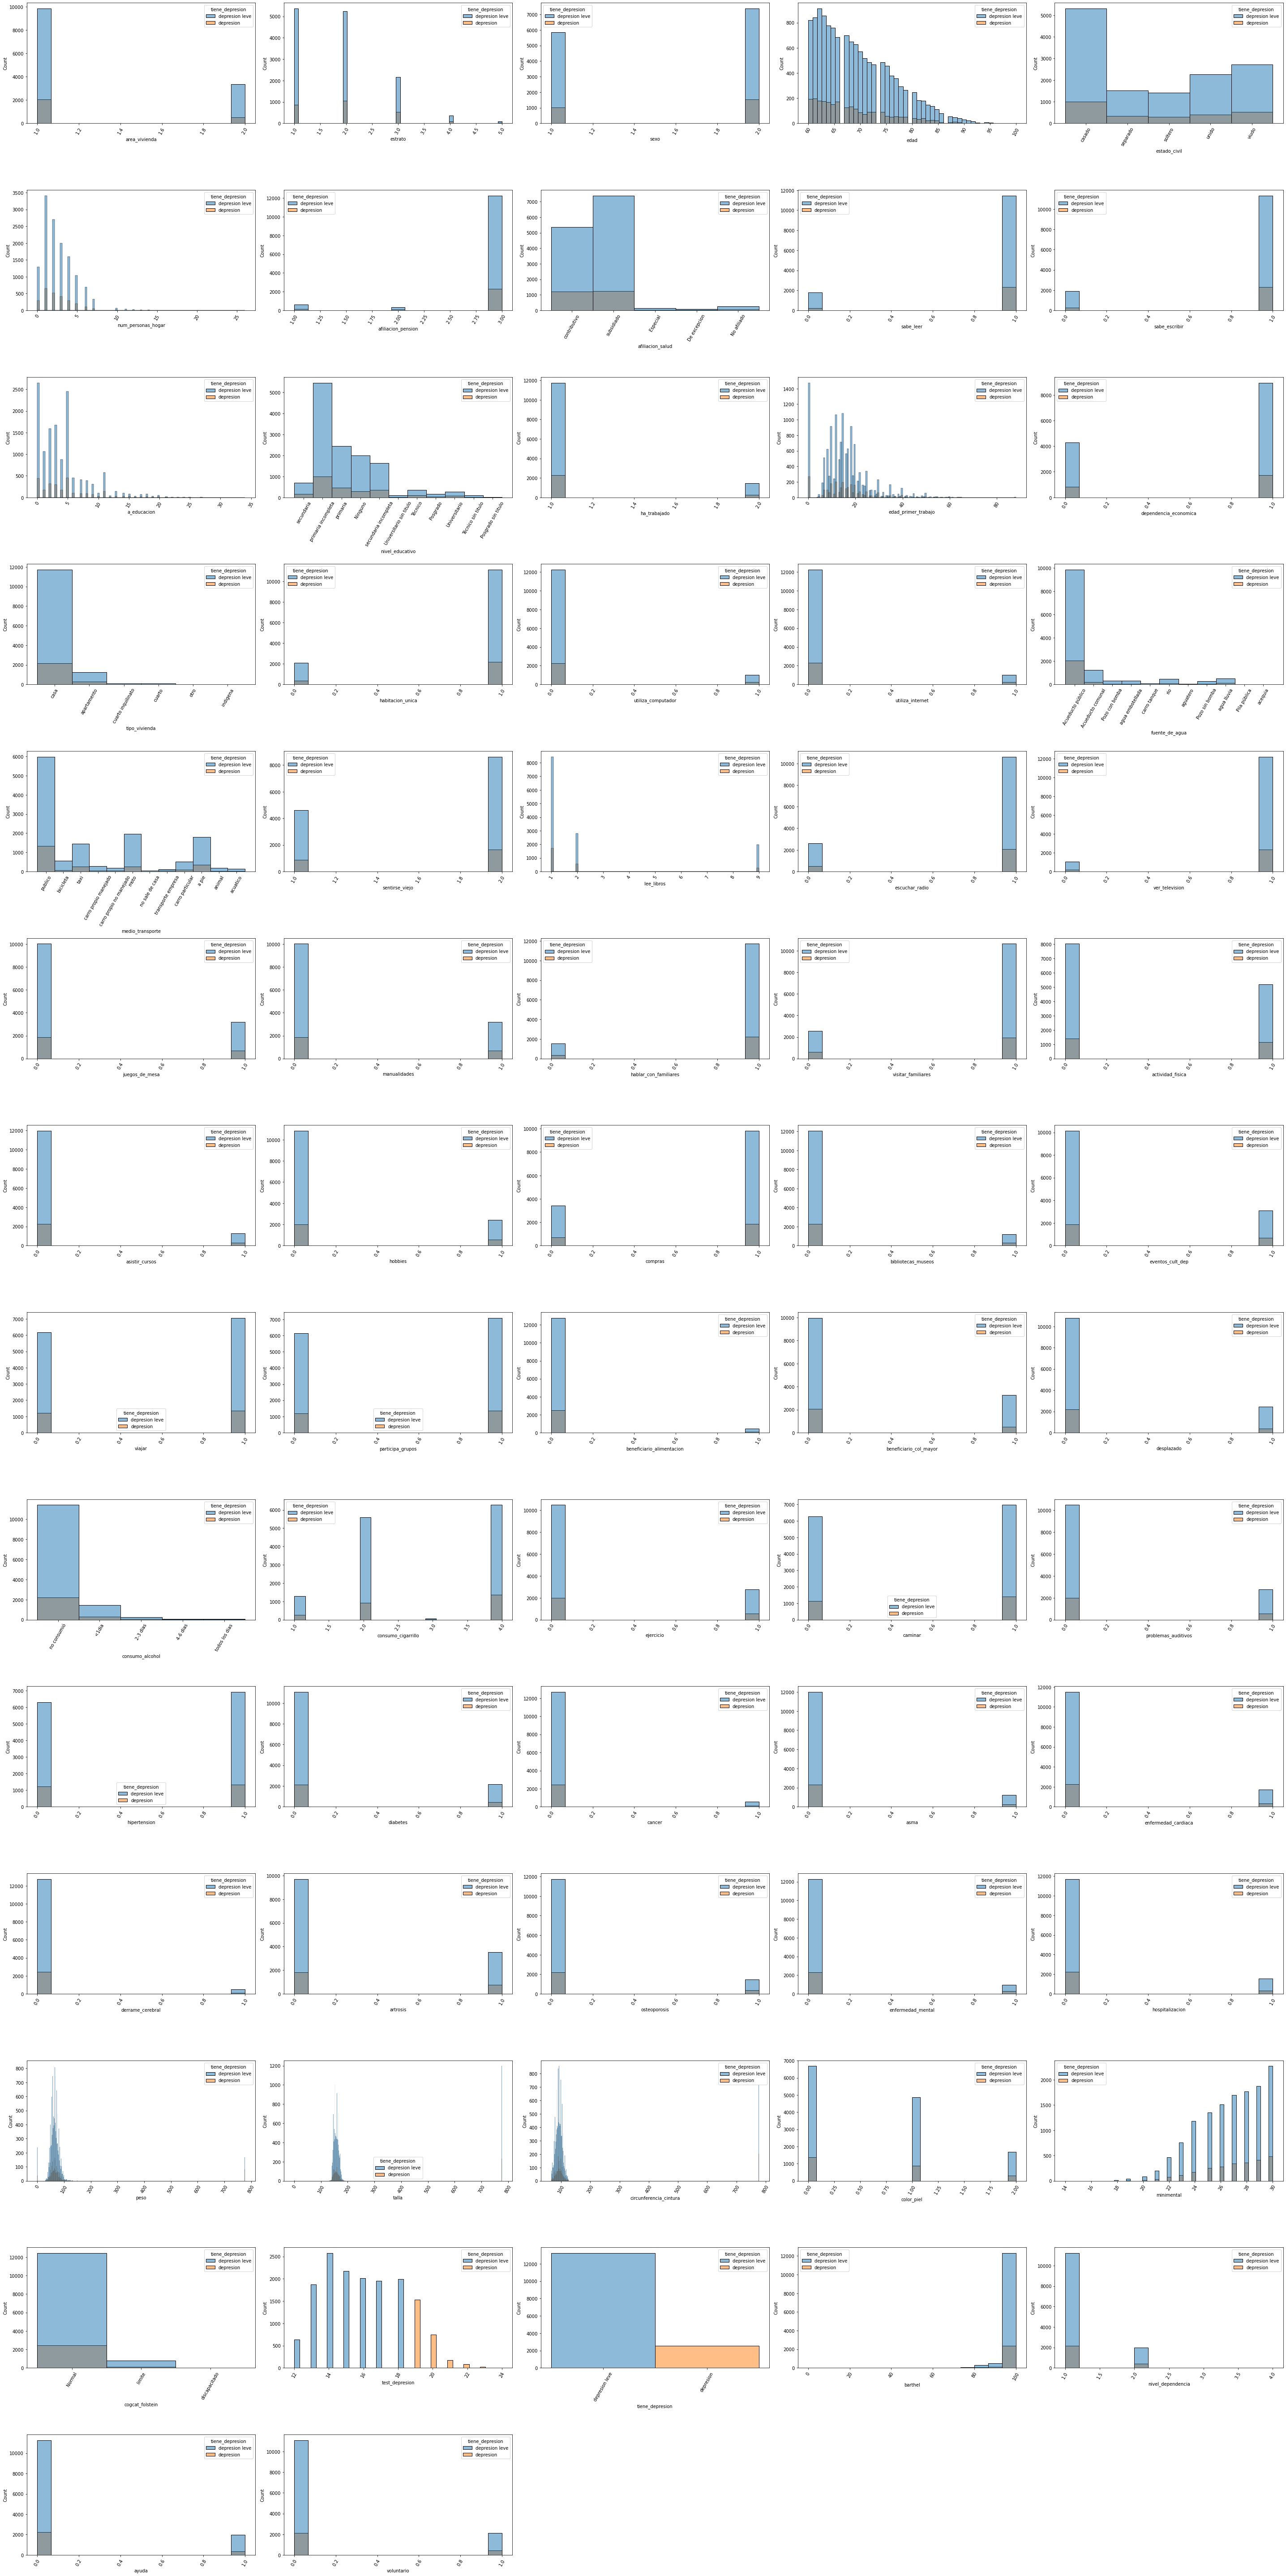

In [51]:
plt.figure(figsize=(40,80))
for i, col in enumerate(df_hist):
    plt.subplot(14,5, i+1)
    sns.histplot(data= df_hist, x= col, hue='tiene_depresion')
    plt.xticks(rotation = 60)
    plt.tight_layout()

<AxesSubplot:xlabel='minimental', ylabel='test_depresion'>

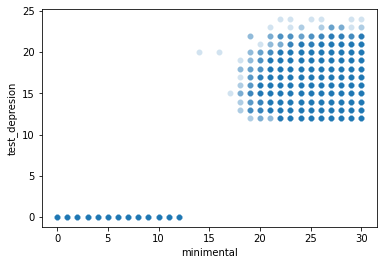

In [52]:
sns.scatterplot(data= df,x='minimental', y ='test_depresion', alpha = 0.2)

<AxesSubplot:xlabel='test_depresion', ylabel='Count'>

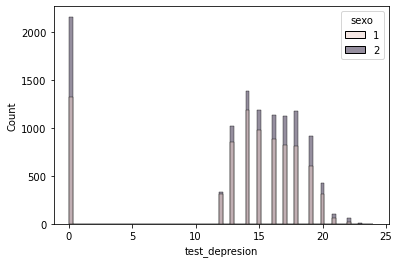

In [53]:
sns.histplot(data=df, x='test_depresion', hue='sexo')